In [3]:
import pandas as pd
import numpy as np
import os, sys
import pickle

MNET_PATH = '/Volumes/Transcend2/phd_metabolomics/git/molnet/code'
sys.path.append(MNET_PATH)

In [4]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'

osp = MAC

In [5]:
sys.path.append('..')
import alignment

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Load in the data

Batch effect was removed using R limma's removebatcheffect.

In [7]:
coef = pd.read_csv(osp+'coefdataseteffect.csv', sep=',', index_col = 0)
batchrem = pd.read_csv(osp+'batchremoved.csv', sep=',', index_col = 0)

In [8]:
batchrem = batchrem.transpose()

In [9]:
vleff = coef['eset.datasetVL']
zikeff = coef['eset.datasetZika']

In [10]:
inter = coef['(Intercept)']

In [11]:
samples_values = pd.read_csv(osp+'pymz/mzmine/221119/modifiedRTfiltereddata.txt', sep='\t', index_col = 0)
samples_values_filled = pd.read_csv(osp+'pymz/mzmine/221119/modifiedRTfiltereddatafilled.txt', sep = '\t', index_col = 0)

annotated_data = pd.read_csv(osp+'pymz/mzmine/221119/annotated_data.csv', sep = ',', index_col = 0)
with open(os.path.join(osp,'pymz/mzmine/HMDBannodat.csv'), 'rb') as file:
    annodat = pickle.load(file)   

In [12]:
batchrem['ConditionDataset'] = samples_values_filled['ConditionDataset']

In [13]:
batchrem['Condition'] = samples_values_filled['Condition']

In [14]:
id_list = [1189, 1439, 1033, 1229, 1463, 565, 712, 298, 895, 3642, 1105, 862, 166,
          6, 168, 38, 1993, 101, 366, 365, 613, 737, 10779, 134, 125, 459, 324, 1839,
          798, 424, 175, 137, 254, 848, 20, 667, 1100, 1359, 487]

In [10]:
with open(os.path.join(osp,'mzmine/HAT_HMDBannotated_data.csv'), 'rb') as file:
    hat_annodat = pickle.load(file)   
    
hat_values = pd.read_csv('/Users/anamaria/Desktop/mzmine/221119/all_samples_log2.csv', sep = ',', index_col = 0)
hat_values_filled = pd.read_csv('/Users/anamaria/Desktop/mzmine/221119/all_samples_log2_filled.csv', sep = ',', index_col = 0)
hat_annotated_data = pd.read_csv('/Users/anamaria/Desktop/mzmine/221119/hat_annotated_data.csv', sep = ',', index_col = 0)

hat_description = pd.read_csv('/Users/anamaria/Desktop/mzmine/221119/sample_description.csv', sep=',', index_col = 0)
hat_description['ConditionDatasetStage'] = hat_description['ConditionDataset'] + hat_description['Stage']

hat_values_filled = hat_values_filled.transpose()
hat_values_filled['ConditionDatasetStage'] = hat_description['ConditionDatasetStage']
hat_values = hat_values.transpose()
hat_values['ConditionDatasetStage'] = hat_description['ConditionDatasetStage']

### Prepare data for training

In [15]:
predictor = batchrem.transpose()[:-2]
predictor = predictor.transpose()
predictor = predictor.apply(pd.to_numeric)
#predictor = predictor.transpose()
#predictor = predictor.loc[pd.Series(annodat.index).astype(str)]
#predictor = predictor.transpose()

In [16]:
target = batchrem.transpose()[-1:]
target = target.replace('infected', 1)
target = target.replace('control', 0)

#target = target.replace('infectedHATS1', 1)
#target = target.replace('infectedHATS2', 1)
#target = target.replace('controlHATcontrol', 0)

target = target.transpose()

In [17]:
from sklearn.model_selection import train_test_split
    
training_data, test_data, training_data_target, test_data_target = train_test_split(predictor, target, 
                                                                                    test_size=0.3, random_state=0)

### Import the classifiers from sklearn

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [19]:
clf = RandomForestClassifier(n_estimators=1000)
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)

### Random Forest Classifiers

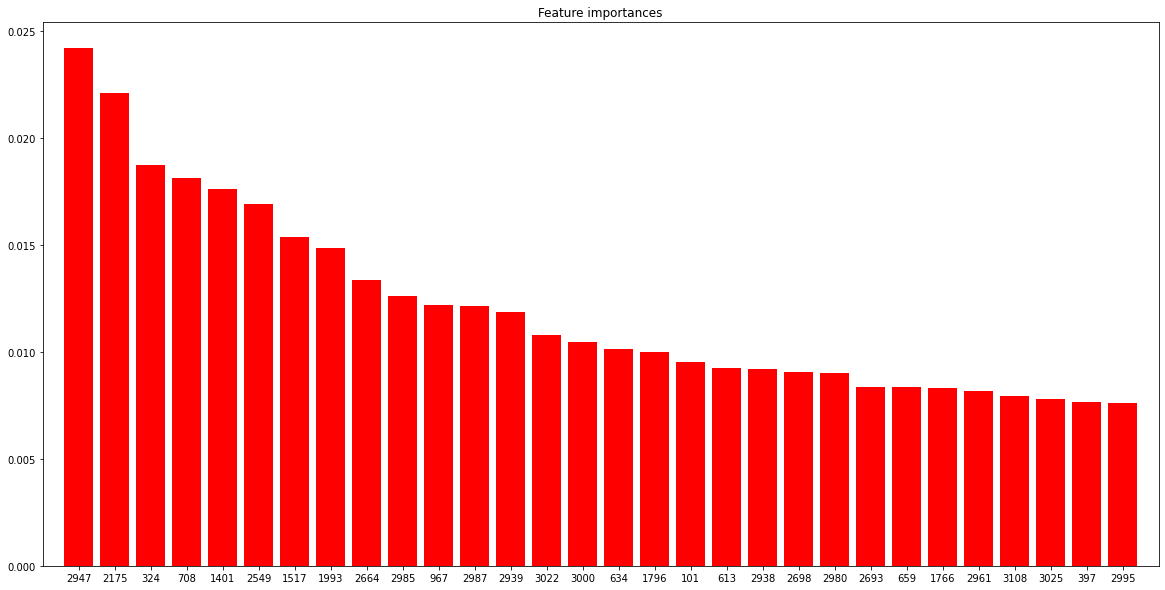

In [37]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



clf = RandomForestClassifier(n_estimators=1000)

clf.fit(predictor, np.array(target.transpose())[0])

importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=training_data.columns, 
                          columns=["Importance"])
importance["Std"] = np.std([tree.feature_importances_
                            for tree in clf.estimators_], axis=0)
importance = importance.sort_values(by='Importance',ascending = False)

# Plot the feature importances of the forest
first_x_values = 30
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(first_x_values), importance['Importance'][0:first_x_values], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(first_x_values), importance.index[0:first_x_values])
plt.xlim([-1, first_x_values])
plt.show()

row m/z                   787.666
row retention time        3.99348
adj p-val             8.34114e-10
t-score                  -8.22249
custom_id                    2947
compound_names                NaN
compound_id                  row3
pathway                       NaN
standards_match               NaN
Name: 2947, dtype: object


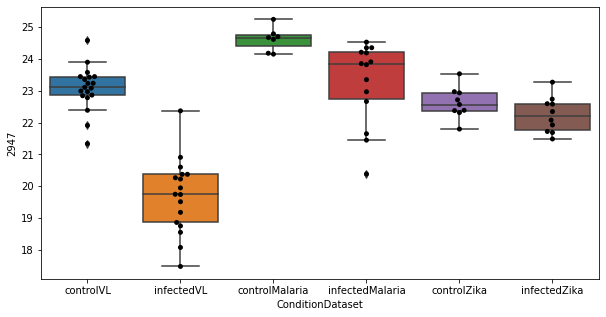

row m/z                   280.235
row retention time        3.07719
adj p-val             5.21148e-09
t-score                   7.58335
custom_id                    2175
compound_names                NaN
compound_id                  row8
pathway                       NaN
standards_match               NaN
Name: 2175, dtype: object


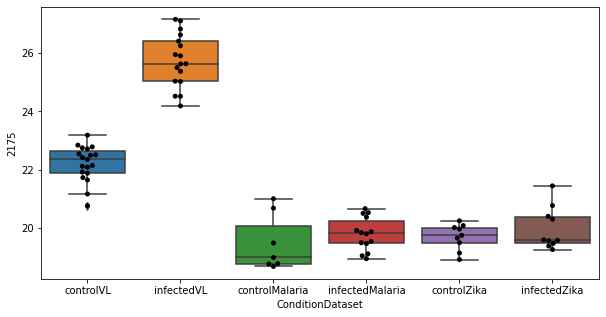

row m/z                                                         126.022
row retention time                                              12.2095
adj p-val                                                   2.82623e-08
t-score                                                        -7.01019
custom_id                                                           324
compound_names        ['Taurine; 2-Aminoethanesulfonic acid; Aminoet...
compound_id                                                    ['E288']
pathway               ['Methionine and cysteine metabolism', 'Bile a...
standards_match                                                     NaN
Name: 324, dtype: object


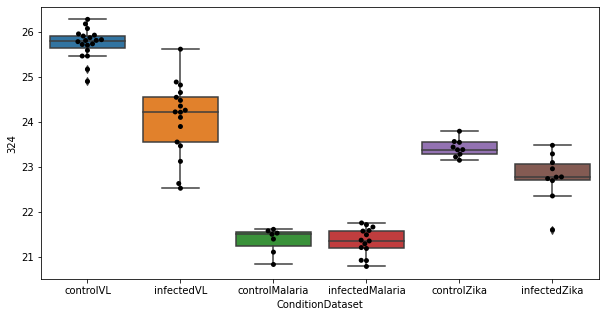

row m/z                                153.091
row retention time                     4.36396
adj p-val                          4.51508e-08
t-score                               -6.84818
custom_id                                  708
compound_names                           [nan]
compound_id                            ['E46']
pathway               ['Linoleate metabolism']
standards_match                            NaN
Name: 708, dtype: object


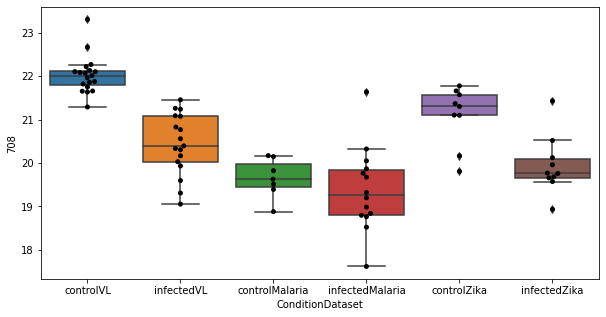

row m/z                                                         203.052
row retention time                                               12.051
adj p-val                                                   2.71912e-09
t-score                                                         7.88909
custom_id                                                          1401
compound_names        ['D-Tagatose; lyxo-Hexulose$1,7-Dimethylxanthi...
compound_id                                                    ['E351']
pathway               ['Tryptophan metabolism', 'Caffeine metabolism...
standards_match                                                     NaN
Name: 1401, dtype: object


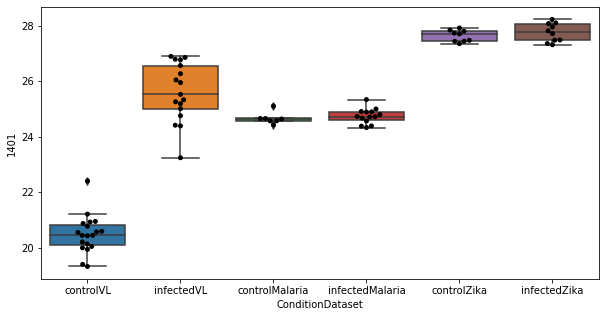

row m/z                                                         380.256
row retention time                                               6.7137
adj p-val                                                   1.76237e-08
t-score                                                          -7.222
custom_id                                                          2549
compound_names        ['Sphingosine 1-phosphate; Sphing-4-enine 1-ph...
compound_id                                                    ['E129']
pathway               ['Glycosphingolipid metabolism', 'Glycerophosp...
standards_match                                                     NaN
Name: 2549, dtype: object


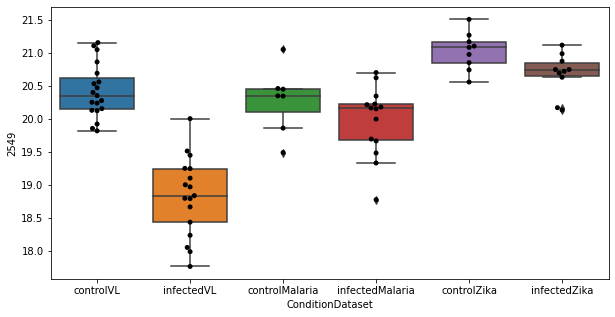

row m/z                   213.022
row retention time        11.9045
adj p-val             2.67017e-10
t-score                  -8.57249
custom_id                    1517
compound_names                NaN
compound_id                  row2
pathway                       NaN
standards_match               NaN
Name: 1517, dtype: object


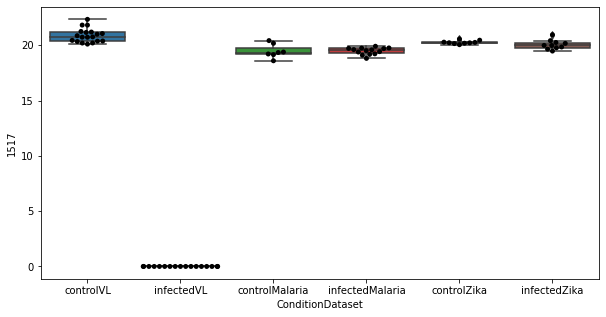

row m/z                                    258.11
row retention time                        11.3506
adj p-val                             3.70129e-07
t-score                                  -6.21188
custom_id                                    1993
compound_names                                NaN
compound_id                                 row42
pathway                                       NaN
standards_match       sn-glycero-3-Phosphocholine
Name: 1993, dtype: object


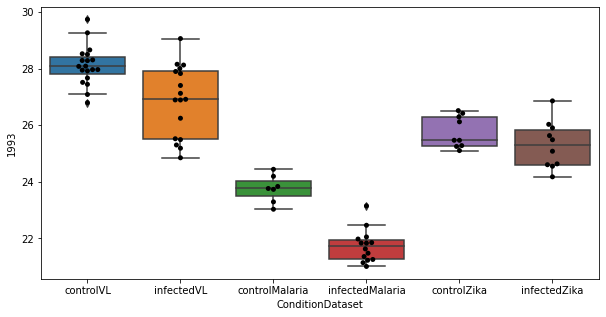

row m/z                                468.308
row retention time                     3.97058
adj p-val                           4.4138e-09
t-score                               -7.68673
custom_id                                 2664
compound_names        ['Timnodonyl carnitine']
compound_id                           ['E385']
pathway                  ['Carnitine shuttle']
standards_match                            NaN
Name: 2664, dtype: object


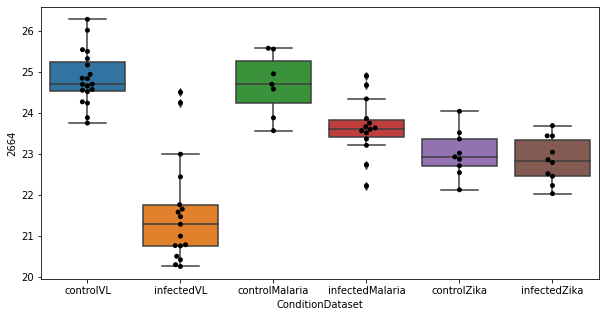

row m/z                   808.583
row retention time        3.16917
adj p-val             1.59704e-08
t-score                  -7.30058
custom_id                    2985
compound_names                NaN
compound_id                  row9
pathway                       NaN
standards_match               NaN
Name: 2985, dtype: object


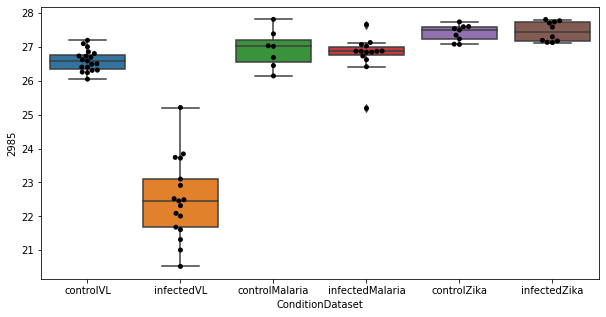

row m/z                    172.08
row retention time        11.8965
adj p-val             6.73294e-08
t-score                   -6.6909
custom_id                     967
compound_names                NaN
compound_id                 row30
pathway                       NaN
standards_match               NaN
Name: 967, dtype: object


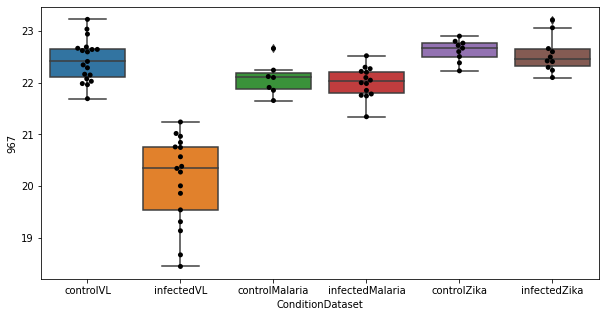

row m/z                   809.588
row retention time        3.18517
adj p-val             5.19469e-09
t-score                  -7.61452
custom_id                    2987
compound_names                NaN
compound_id                  row7
pathway                       NaN
standards_match               NaN
Name: 2987, dtype: object


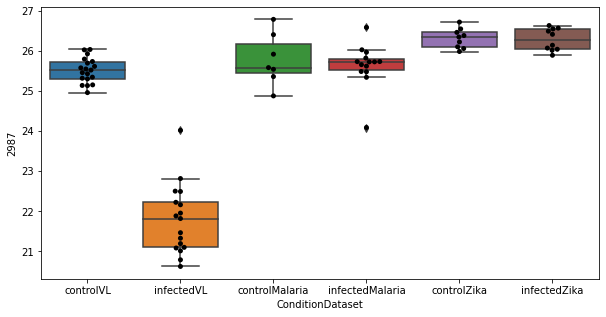

row m/z                   785.588
row retention time        3.20243
adj p-val             8.68885e-08
t-score                  -6.61645
custom_id                    2939
compound_names                NaN
compound_id                 row32
pathway                       NaN
standards_match               NaN
Name: 2939, dtype: object


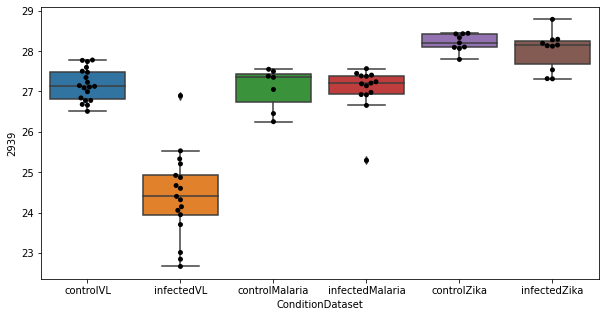

row m/z                   832.584
row retention time        3.16211
adj p-val             2.67017e-10
t-score                  -8.69038
custom_id                    3022
compound_names                NaN
compound_id                  row1
pathway                       NaN
standards_match               NaN
Name: 3022, dtype: object


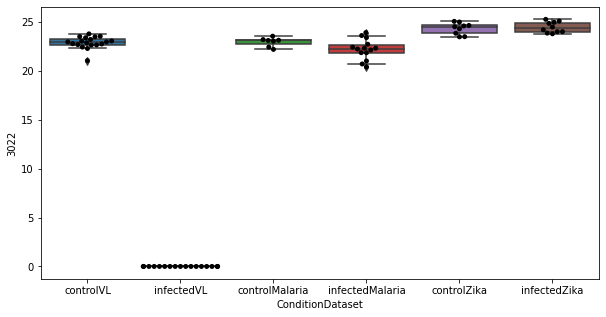

row m/z                  816.702
row retention time       3.30197
adj p-val             4.4638e-06
t-score                 -5.47659
custom_id                   3000
compound_names               NaN
compound_id                row73
pathway                      NaN
standards_match              NaN
Name: 3000, dtype: object


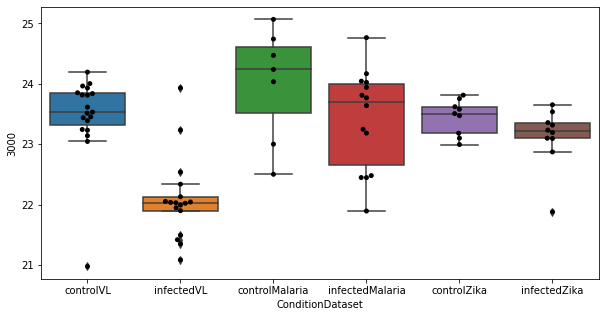

row m/z                                                          148.08
row retention time                                              11.9036
adj p-val                                                   1.88143e-08
t-score                                                        -7.16165
custom_id                                                           634
compound_names        ['D-Glutamine; D-2-Aminoglutaramic acid$L-Glut...
compound_id                                                    ['E237']
pathway               ['Pyrimidine metabolism', 'Nitrogen metabolism...
standards_match                                                     NaN
Name: 634, dtype: object


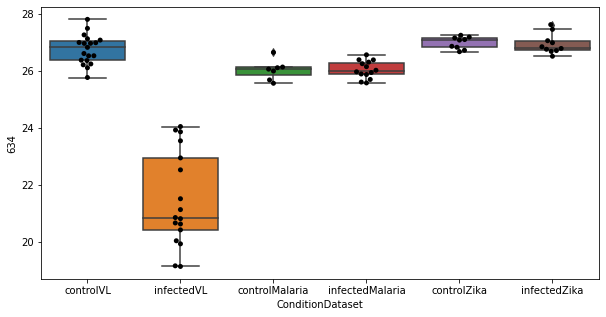

row m/z                   236.073
row retention time        11.8556
adj p-val             4.51508e-08
t-score                     6.826
custom_id                    1796
compound_names                NaN
compound_id                 row25
pathway                       NaN
standards_match               NaN
Name: 1796, dtype: object


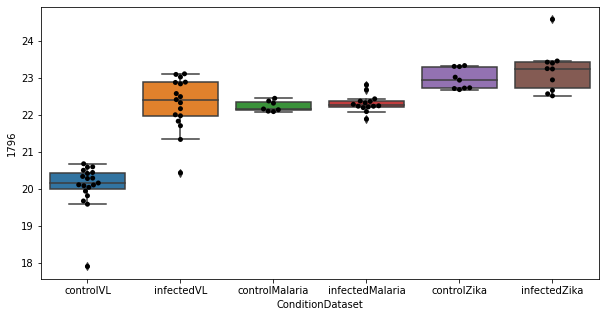

row m/z                                                         101.071
row retention time                                                11.93
adj p-val                                                    3.7122e-09
t-score                                                        -7.76761
custom_id                                                           101
compound_names        ['5,6-Dihydrothymine; Dihydrothymine; 5,6-Dihy...
compound_id                                            ['E171', 'E237']
pathway               ['Pyrimidine metabolism', 'Nitrogen metabolism...
standards_match                                                     NaN
Name: 101, dtype: object


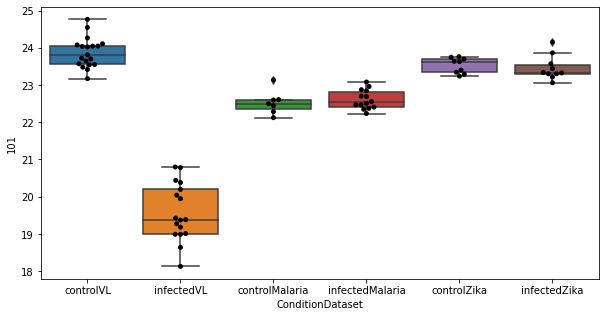

row m/z                                                         147.076
row retention time                                              11.9052
adj p-val                                                   1.76237e-08
t-score                                                        -7.21205
custom_id                                                           613
compound_names        ['5,6-Dihydrothymine; Dihydrothymine; 5,6-Dihy...
compound_id                                            ['E171', 'E237']
pathway               ['Pyrimidine metabolism', 'Nitrogen metabolism...
standards_match                                                     NaN
Name: 613, dtype: object


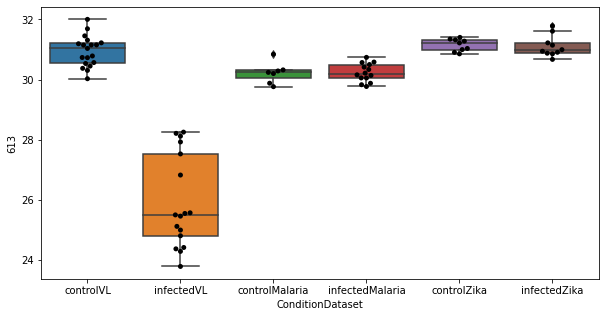

row m/z                   784.584
row retention time        3.19568
adj p-val             6.61996e-08
t-score                  -6.70947
custom_id                    2938
compound_names                NaN
compound_id                 row28
pathway                       NaN
standards_match               NaN
Name: 2938, dtype: object


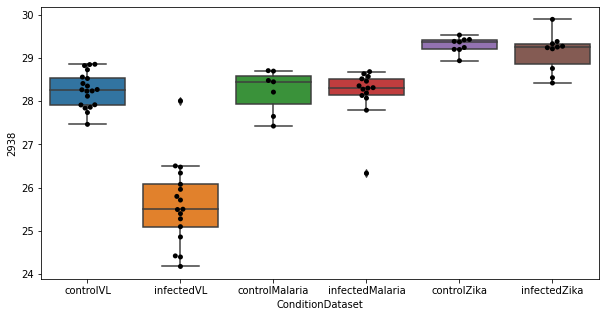

row m/z                   497.343
row retention time        3.82271
adj p-val             6.75363e-05
t-score                  -4.69668
custom_id                    2698
compound_names                NaN
compound_id                row103
pathway                       NaN
standards_match               NaN
Name: 2698, dtype: object


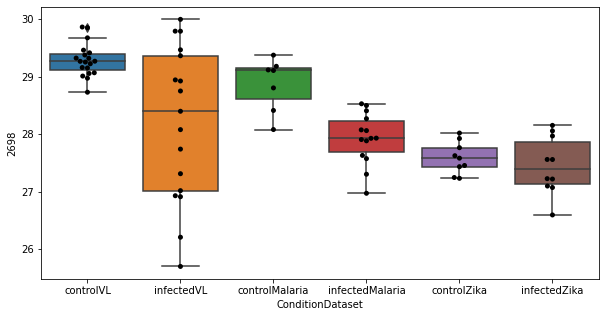

row m/z                   806.569
row retention time        3.17983
adj p-val             4.51508e-08
t-score                   -6.8284
custom_id                    2980
compound_names                NaN
compound_id                 row24
pathway                       NaN
standards_match               NaN
Name: 2980, dtype: object


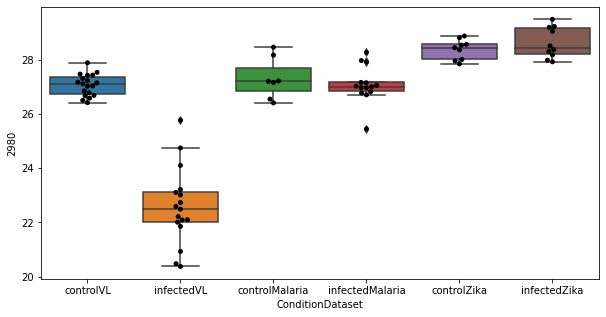

row m/z                              494.324
row retention time                   3.86492
adj p-val                        5.85998e-07
t-score                             -6.07085
custom_id                               2693
compound_names        ['cervonyl carnitine']
compound_id                         ['E622']
pathway                ['Carnitine shuttle']
standards_match                          NaN
Name: 2693, dtype: object


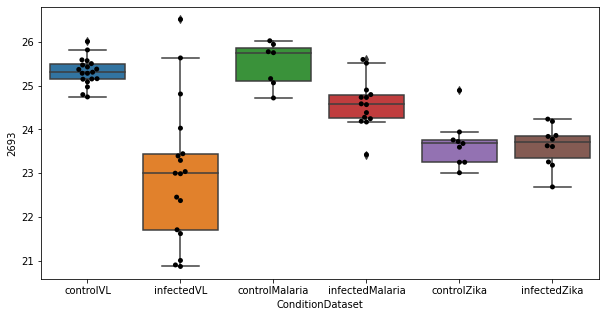

row m/z                                                         149.081
row retention time                                              11.9079
adj p-val                                                   1.81428e-08
t-score                                                        -7.18702
custom_id                                                           659
compound_names        ['(R)-Mevalonate; Mevalonic acid; 3,5-Dihydrox...
compound_id                                                    ['E616']
pathway                       ['Squalene and cholesterol biosynthesis']
standards_match                                                     NaN
Name: 659, dtype: object


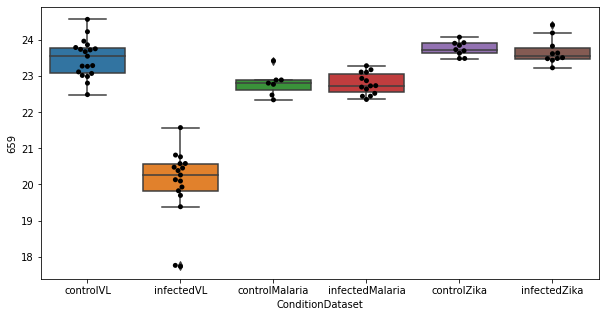

row m/z                   234.015
row retention time        9.79681
adj p-val             6.40018e-05
t-score                  -4.71603
custom_id                    1766
compound_names                NaN
compound_id                row101
pathway                       NaN
standards_match               NaN
Name: 1766, dtype: object


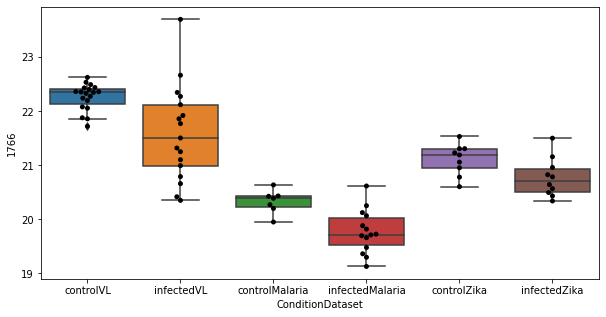

row m/z                   795.609
row retention time        3.17042
adj p-val             9.17723e-07
t-score                  -5.94608
custom_id                    2961
compound_names                NaN
compound_id                 row51
pathway                       NaN
standards_match               NaN
Name: 2961, dtype: object


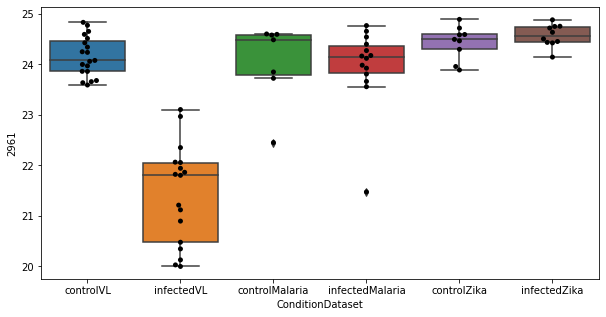

row m/z                    904.59
row retention time        2.99672
adj p-val             3.25771e-08
t-score                  -6.96494
custom_id                    3108
compound_names                NaN
compound_id                 row19
pathway                       NaN
standards_match               NaN
Name: 3108, dtype: object


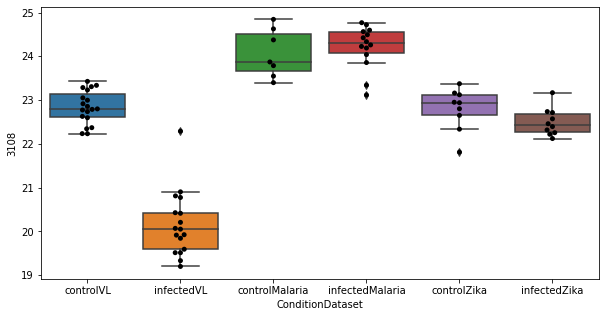

row m/z                     834.6
row retention time        3.15696
adj p-val             3.50545e-07
t-score                  -6.23632
custom_id                    3025
compound_names                NaN
compound_id                 row40
pathway                       NaN
standards_match               NaN
Name: 3025, dtype: object


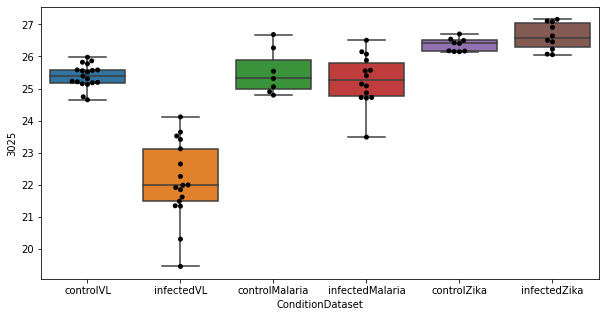

row m/z                                                         131.053
row retention time                                              11.8873
adj p-val                                                   1.29939e-07
t-score                                                        -6.50144
custom_id                                                           397
compound_names        ['1-Pyrroline-4-hydroxy-2-carboxylate$L-1-Pyrr...
compound_id                                                    ['E207']
pathway               ['Glutathione Metabolism', 'Aspartate and aspa...
standards_match                                                     NaN
Name: 397, dtype: object


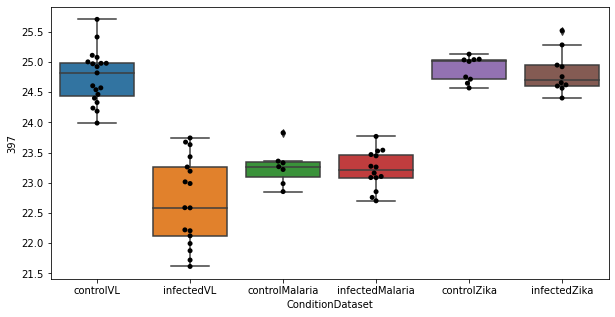

row m/z                    813.62
row retention time        3.16736
adj p-val             1.81878e-07
t-score                  -6.41594
custom_id                    2995
compound_names                NaN
compound_id                 row36
pathway                       NaN
standards_match               NaN
Name: 2995, dtype: object


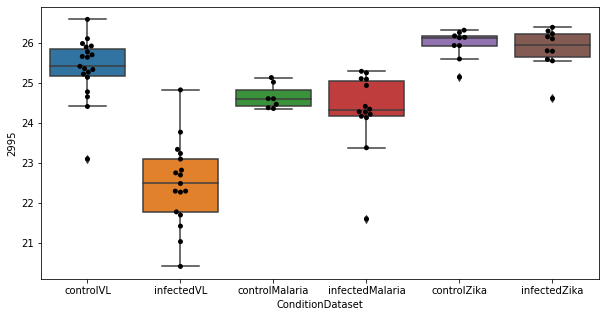

In [47]:
from metab_utils import plot_boxplots
for i in list(importance.index)[0:first_x_values]:
    print(annotated_data.loc[int(i)])
    plot_boxplots(samples_values_filled, str(i), 'ConditionDataset', (15,30), y = False )

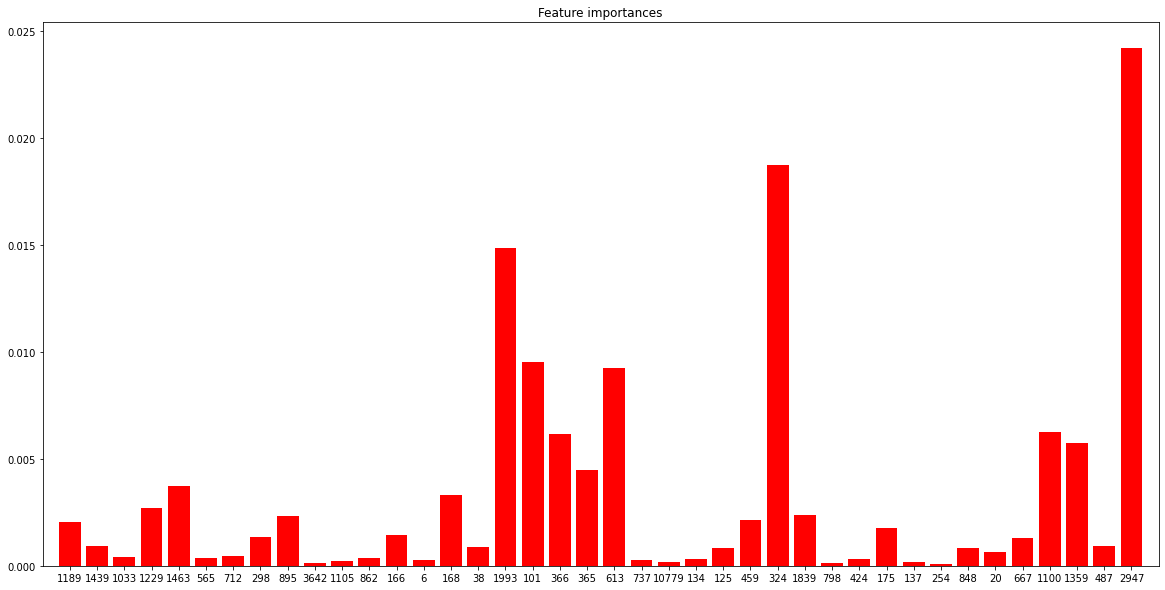

In [43]:
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(id_list)), importance.loc[id_list]['Importance'], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(len(id_list)), id_list)
plt.xlim([-1, len(id_list)])
plt.show()

### XGB Classifier

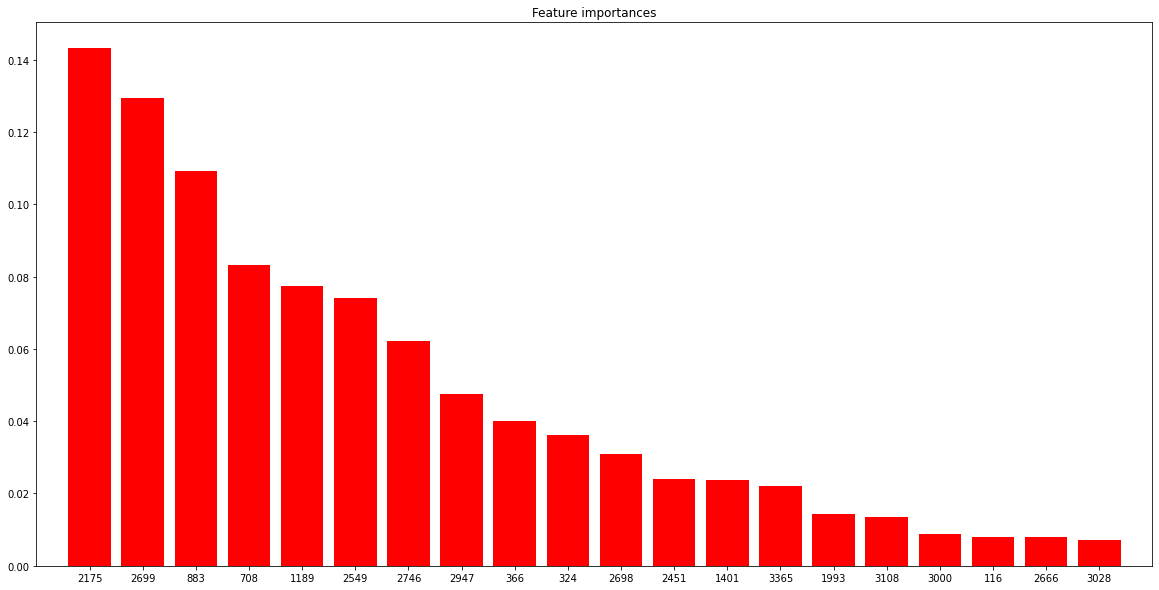

In [22]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

model = XGBClassifier()
# fit the model
model.fit(predictor, np.array(target.transpose())[0])
# get importance
importance = model.feature_importances_
importance = pd.DataFrame(importance, index=training_data.columns, 
                          columns=["Importance"])

importance = importance.sort_values(by='Importance',ascending = False)

# Plot the feature importances of the forest
first_x_values = 20

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(first_x_values), importance['Importance'][0:first_x_values], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(first_x_values), importance.index[0:first_x_values])
plt.xlim([-1, first_x_values])
plt.show()

In [57]:
#from metab_utils import plot_boxplots_individual_dataset
#first_x_values = 10
#for i in list(importance.index)[0:first_x_values]:
#    if i in hat_annotated_data.index:
#        print(hat_annotated_data.loc[int(i)])
#    if i in hat_annodat.index:
#        print('yes')
#        print(hat_annodat.loc[i]['HMDBspecAnno'])
#    plot_boxplots_individual_dataset(hat_values_filled, i, 'ConditionDatasetStage', (15,30), y = False )

row m/z                   280.235
row retention time        3.07719
adj p-val             5.21148e-09
t-score                   7.58335
custom_id                    2175
compound_names                NaN
compound_id                  row8
pathway                       NaN
standards_match               NaN
Name: 2175, dtype: object


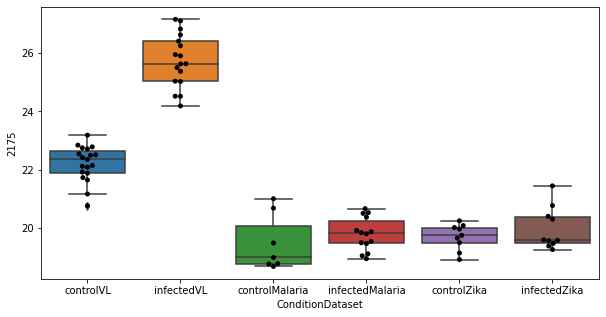

row m/z                   497.343
row retention time        6.69023
adj p-val             0.000349026
t-score                  -4.20414
custom_id                    2699
compound_names                NaN
compound_id                row122
pathway                       NaN
standards_match               NaN
Name: 2699, dtype: object


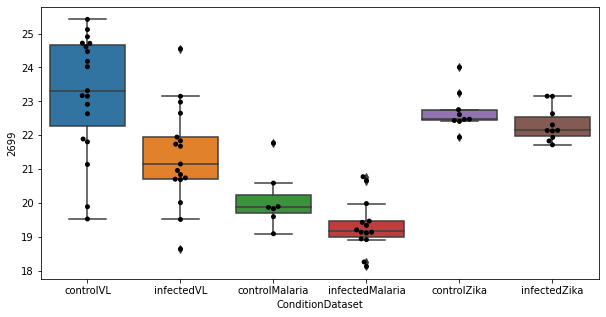

row m/z                                                         165.055
row retention time                                              10.8288
adj p-val                                                      0.387155
t-score                                                         1.07621
custom_id                                                           883
compound_names        ['L-Tyrosine; (S)-3-(p-Hydroxyphenyl)alanine; ...
compound_id                                     ['E81', 'E580', 'E636']
pathway                                                             NaN
standards_match                                                     NaN
Name: 883, dtype: object


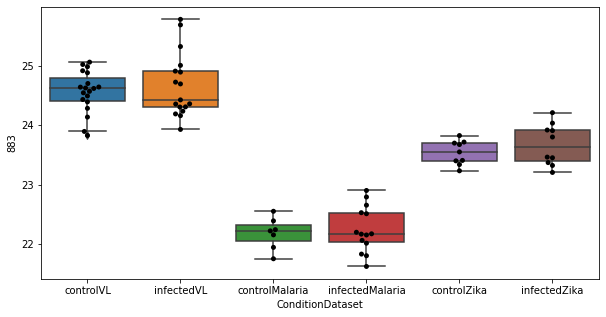

row m/z                                153.091
row retention time                     4.36396
adj p-val                          4.51508e-08
t-score                               -6.84818
custom_id                                  708
compound_names                           [nan]
compound_id                            ['E46']
pathway               ['Linoleate metabolism']
standards_match                            NaN
Name: 708, dtype: object


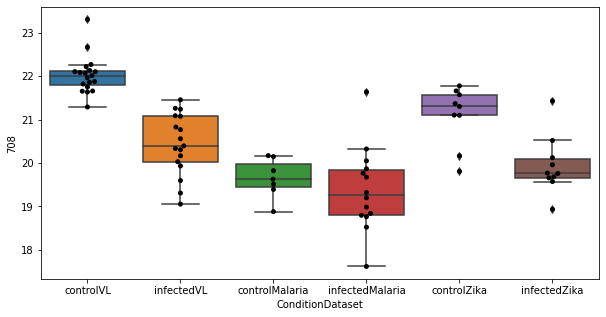

row m/z                                                         188.071
row retention time                                              9.95592
adj p-val                                                     0.0209499
t-score                                                        -2.71872
custom_id                                                          1189
compound_names        ['L-Tryptophan; Tryptophan; (S)-alpha-Amino-be...
compound_id                                            ['E340', 'E632']
pathway                                       ['Tryptophan metabolism']
standards_match                                                     NaN
Name: 1189, dtype: object


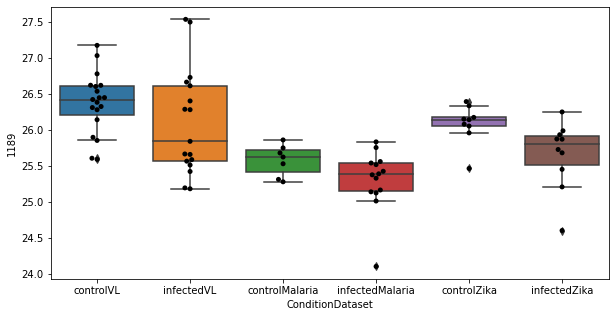

row m/z                                                         380.256
row retention time                                               6.7137
adj p-val                                                   1.76237e-08
t-score                                                          -7.222
custom_id                                                          2549
compound_names        ['Sphingosine 1-phosphate; Sphing-4-enine 1-ph...
compound_id                                                    ['E129']
pathway               ['Glycosphingolipid metabolism', 'Glycerophosp...
standards_match                                                     NaN
Name: 2549, dtype: object


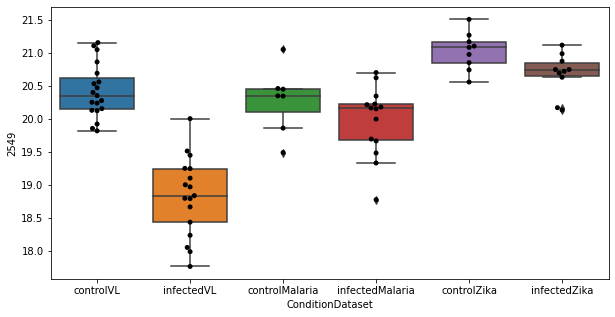

row m/z                 546.355
row retention time      3.69144
adj p-val             0.0190526
t-score                -2.75931
custom_id                  2746
compound_names              NaN
compound_id              row230
pathway                     NaN
standards_match             NaN
Name: 2746, dtype: object


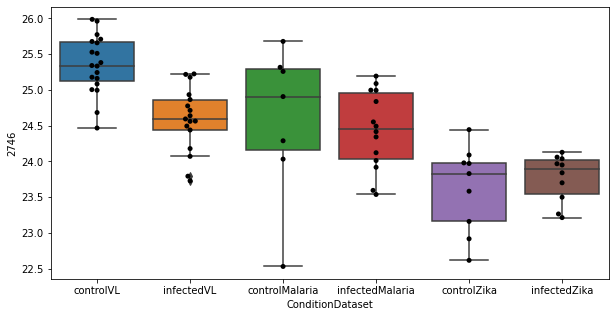

row m/z                   787.666
row retention time        3.99348
adj p-val             8.34114e-10
t-score                  -8.22249
custom_id                    2947
compound_names                NaN
compound_id                  row3
pathway                       NaN
standards_match               NaN
Name: 2947, dtype: object


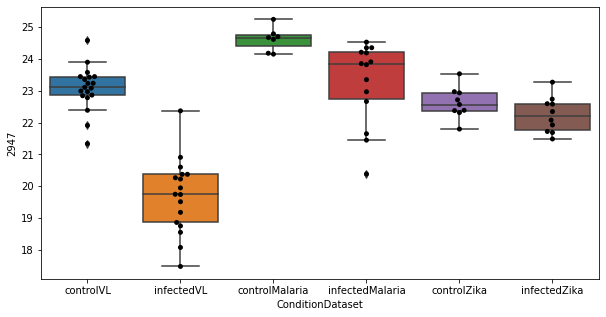

row m/z                                                          130.05
row retention time                                              9.23574
adj p-val                                                   1.58577e-05
t-score                                                        -5.11524
custom_id                                                           366
compound_names        ['1-Pyrroline-4-hydroxy-2-carboxylate$5-Oxo-L-...
compound_id                                            ['E139', 'E665']
pathway               ['Pyrimidine metabolism', 'Nitrogen metabolism...
standards_match                                            5-Oxoproline
Name: 366, dtype: object


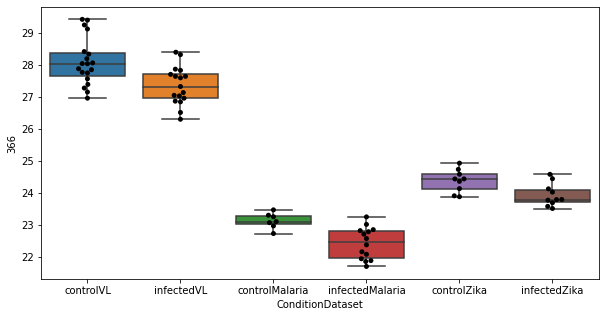

row m/z                                                         126.022
row retention time                                              12.2095
adj p-val                                                   2.82623e-08
t-score                                                        -7.01019
custom_id                                                           324
compound_names        ['Taurine; 2-Aminoethanesulfonic acid; Aminoet...
compound_id                                                    ['E288']
pathway               ['Methionine and cysteine metabolism', 'Bile a...
standards_match                                                     NaN
Name: 324, dtype: object


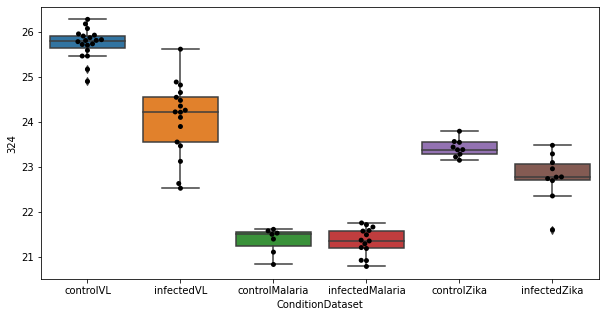

row m/z                   497.343
row retention time        3.82271
adj p-val             6.75363e-05
t-score                  -4.69668
custom_id                    2698
compound_names                NaN
compound_id                row103
pathway                       NaN
standards_match               NaN
Name: 2698, dtype: object


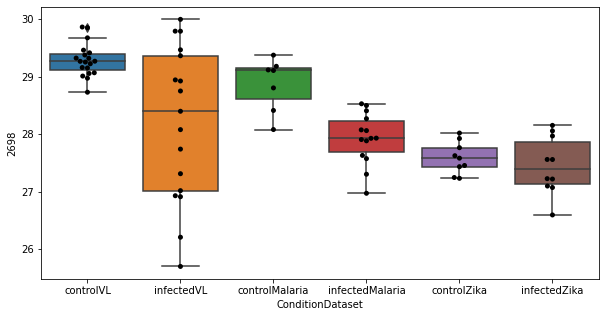

row m/z                 338.342
row retention time      3.33679
adj p-val             0.0088424
t-score                -3.05982
custom_id                  2451
compound_names              NaN
compound_id              row209
pathway                     NaN
standards_match             NaN
Name: 2451, dtype: object


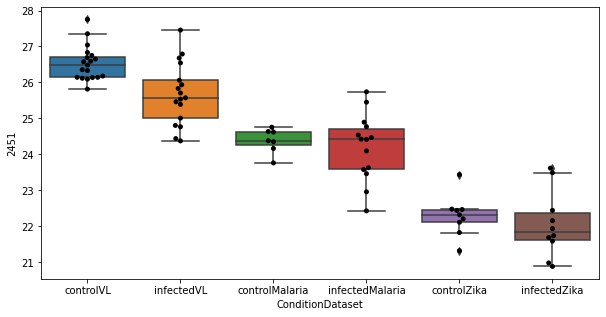

row m/z                                                         203.052
row retention time                                               12.051
adj p-val                                                   2.71912e-09
t-score                                                         7.88909
custom_id                                                          1401
compound_names        ['D-Tagatose; lyxo-Hexulose$1,7-Dimethylxanthi...
compound_id                                                    ['E351']
pathway               ['Tryptophan metabolism', 'Caffeine metabolism...
standards_match                                                     NaN
Name: 1401, dtype: object


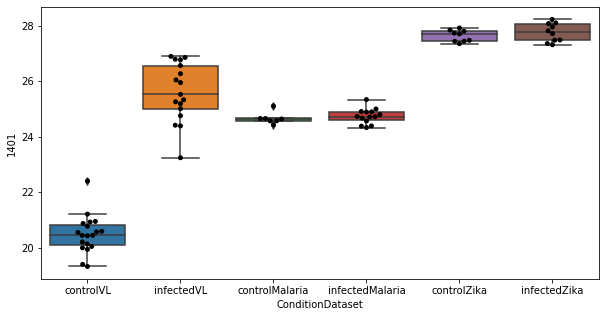

row m/z                                                         139.058
row retention time                                              9.88209
adj p-val                                                    0.00633539
t-score                                                        -3.18702
custom_id                                                          3365
compound_names        ['Anthranilate; Anthranilic acid; o-Aminobenzo...
compound_id                                                    ['E301']
pathway                                       ['Tryptophan metabolism']
standards_match                                                     NaN
Name: 3365, dtype: object


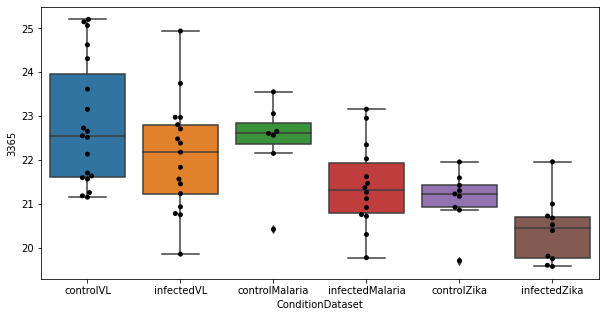

row m/z                                    258.11
row retention time                        11.3506
adj p-val                             3.70129e-07
t-score                                  -6.21188
custom_id                                    1993
compound_names                                NaN
compound_id                                 row42
pathway                                       NaN
standards_match       sn-glycero-3-Phosphocholine
Name: 1993, dtype: object


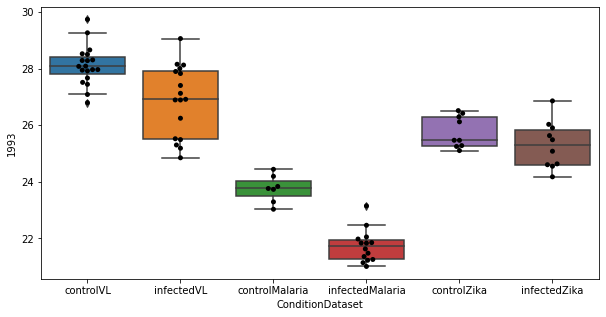

row m/z                    904.59
row retention time        2.99672
adj p-val             3.25771e-08
t-score                  -6.96494
custom_id                    3108
compound_names                NaN
compound_id                 row19
pathway                       NaN
standards_match               NaN
Name: 3108, dtype: object


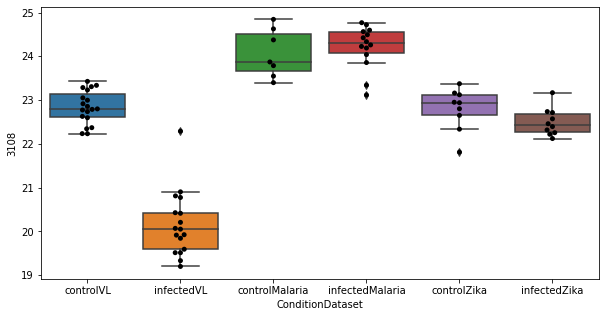

row m/z                  816.702
row retention time       3.30197
adj p-val             4.4638e-06
t-score                 -5.47659
custom_id                   3000
compound_names               NaN
compound_id                row73
pathway                      NaN
standards_match              NaN
Name: 3000, dtype: object


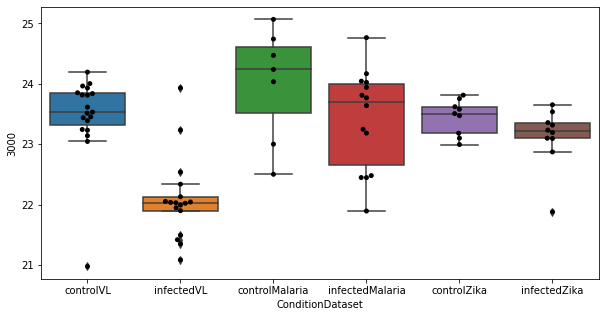

row m/z                 103.07
row retention time     9.63256
adj p-val              0.64999
t-score              -0.598816
custom_id                  116
compound_names             NaN
compound_id             row511
pathway                    NaN
standards_match            NaN
Name: 116, dtype: object


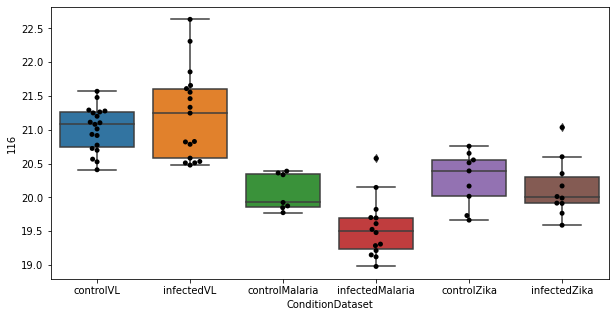

row m/z                   469.312
row retention time        3.97423
adj p-val             1.99028e-06
t-score                  -5.73089
custom_id                    2666
compound_names                NaN
compound_id                 row58
pathway                       NaN
standards_match               NaN
Name: 2666, dtype: object


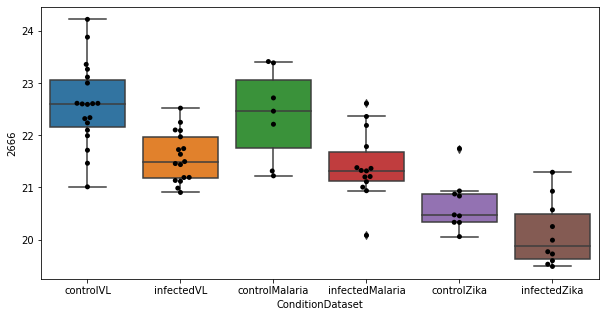

row m/z                   837.618
row retention time        3.15077
adj p-val             2.21109e-06
t-score                  -5.70113
custom_id                    3028
compound_names                NaN
compound_id                 row59
pathway                       NaN
standards_match               NaN
Name: 3028, dtype: object


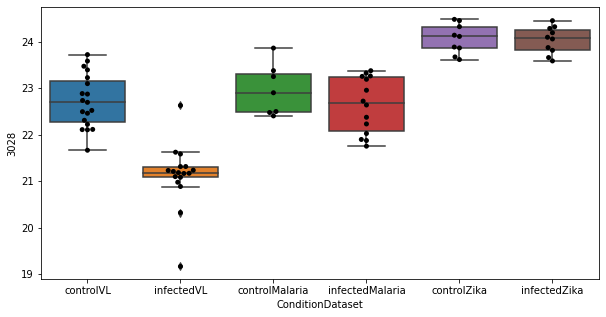

In [58]:
for i in list(importance.index)[0:first_x_values]:
    print(annotated_data.loc[int(i)])
    plot_boxplots(samples_values_filled, str(i), 'ConditionDataset', (15,30), y = False )

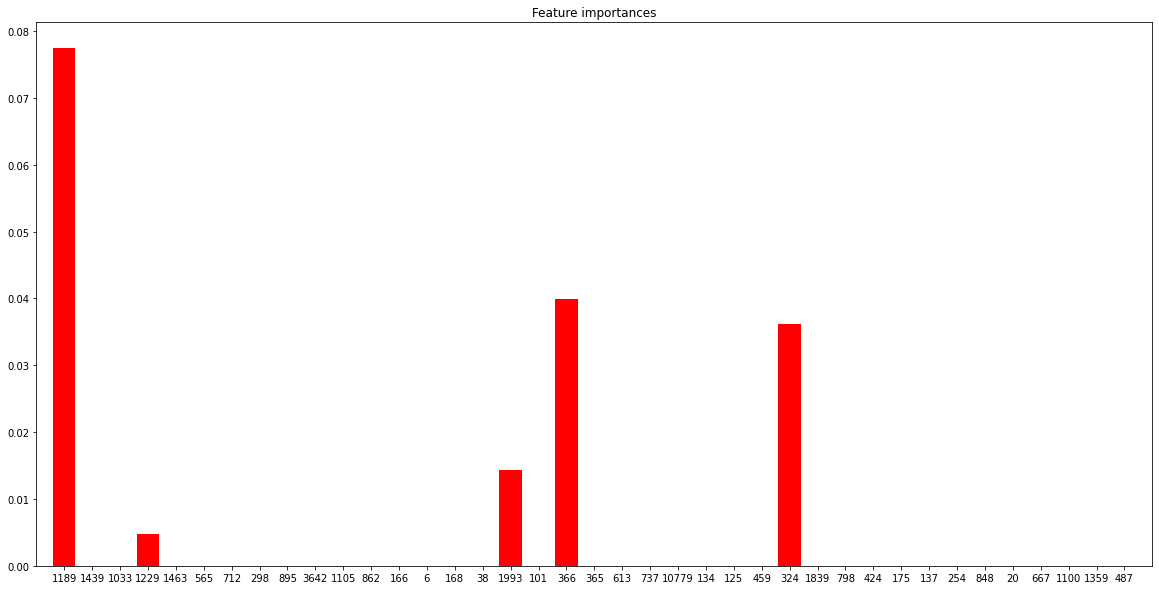

In [23]:
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(id_list)), importance.loc[id_list]['Importance'], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(len(id_list)), id_list)
plt.xlim([-1, len(id_list)])
plt.show()

### LDA

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(predictor, np.array(target.transpose())[0])
importance = model.coef_[0]

row m/z                                                         132.102
row retention time                                              6.70334
adj p-val                                                      0.660041
t-score                                                       -0.581202
custom_id                                                           418
compound_names        ['5-Acetamidopentanoate', 'L-Isoleucine; 2-Ami...
compound_id                                            ['E363', 'E647']
pathway                  ['Valine, leucine and isoleucine degradation']
standards_match                                                     NaN
Name: 418, dtype: object


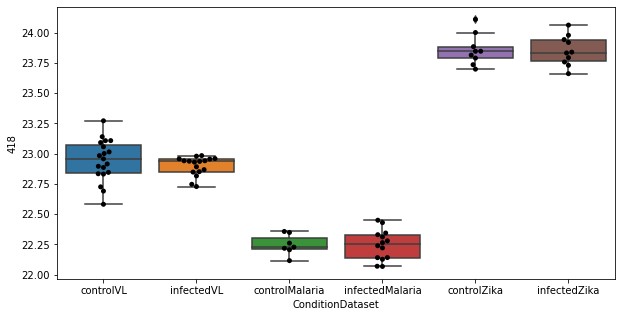

row m/z                158.081
row retention time      4.5265
adj p-val             0.794591
t-score              -0.340959
custom_id                 4755
compound_names             NaN
compound_id             row558
pathway                    NaN
standards_match            NaN
Name: 4755, dtype: object


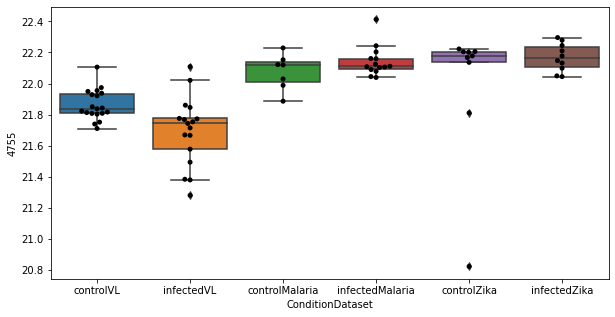

row m/z                218.211
row retention time     6.69938
adj p-val             0.119789
t-score               -1.89074
custom_id                 1599
compound_names             NaN
compound_id             row315
pathway                    NaN
standards_match            NaN
Name: 1599, dtype: object


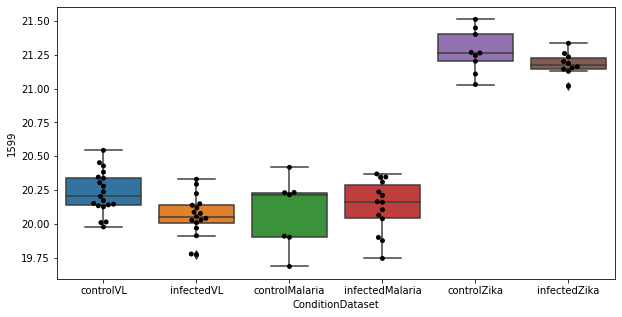

row m/z                                                         128.071
row retention time                                              9.77144
adj p-val                                                    0.00210076
t-score                                                         3.60453
custom_id                                                           338
compound_names        ['2,3,4,5-Tetrahydropyridine-2-carboxylate; de...
compound_id                                             ['E12', 'E663']
pathway               ['Aspartate and asparagine metabolism', 'Argin...
standards_match                                                     NaN
Name: 338, dtype: object


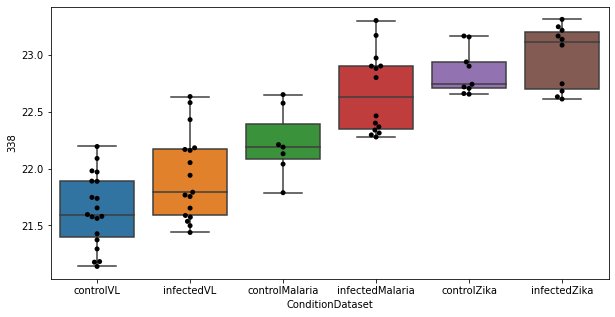

row m/z                                                         174.113
row retention time                                              6.71072
adj p-val                                                    0.00362318
t-score                                                        -3.41528
custom_id                                                          1005
compound_names        ['Pantothenate; Pantothenic acid; (R)-Pantothe...
compound_id                                                     ['E23']
pathway               ['Vitamin B5 - CoA biosynthesis from pantothen...
standards_match                                                     NaN
Name: 1005, dtype: object


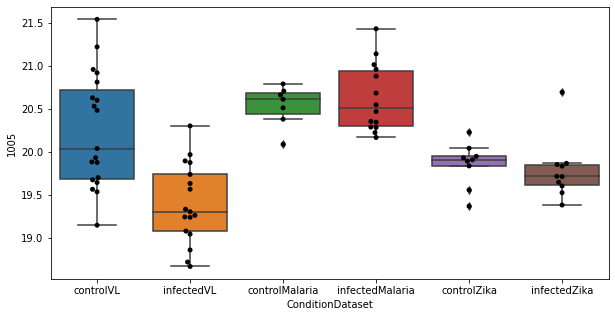

row m/z                240.142
row retention time     6.70326
adj p-val             0.816251
t-score               0.300131
custom_id                 1832
compound_names             NaN
compound_id             row566
pathway                    NaN
standards_match            NaN
Name: 1832, dtype: object


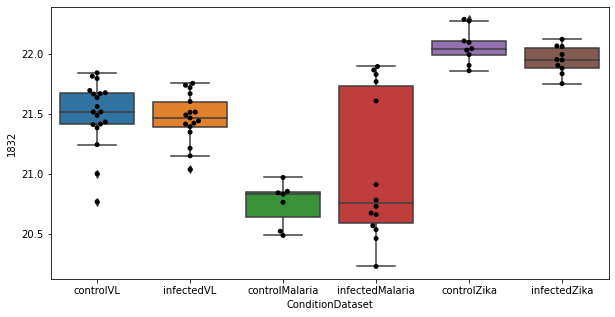

row m/z                145.097
row retention time     11.1439
adj p-val             0.342174
t-score                1.17374
custom_id                  583
compound_names             NaN
compound_id             row431
pathway                    NaN
standards_match            NaN
Name: 583, dtype: object


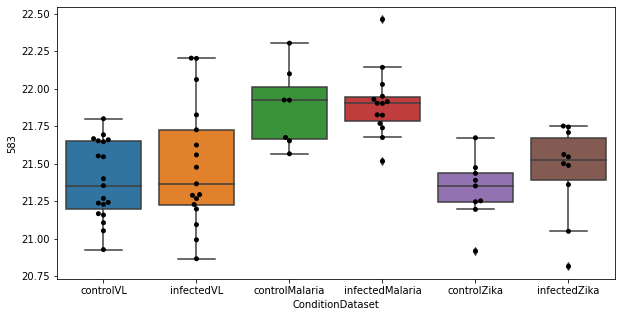

row m/z                               201.112
row retention time                    6.70075
adj p-val                             0.52526
t-score                             -0.821202
custom_id                                1383
compound_names        ['propionyl-carnitine']
compound_id                          ['E633']
pathway                                   NaN
standards_match                           NaN
Name: 1383, dtype: object


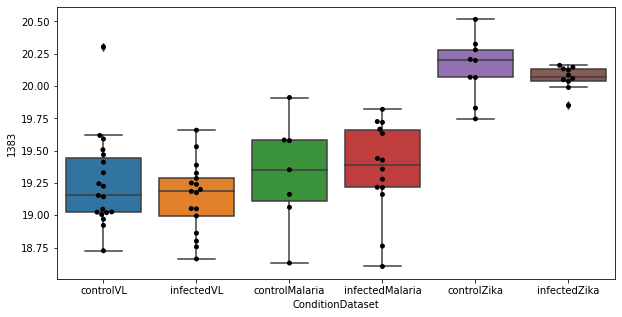

row m/z                                                         114.055
row retention time                                              6.71171
adj p-val                                                       0.83464
t-score                                                       -0.261646
custom_id                                                           181
compound_names        ['5-Aminolevulinate; 5-Amino-4-oxopentanoate; ...
compound_id                                            ['E236', 'E484']
pathway                                                             NaN
standards_match                                                     NaN
Name: 181, dtype: object


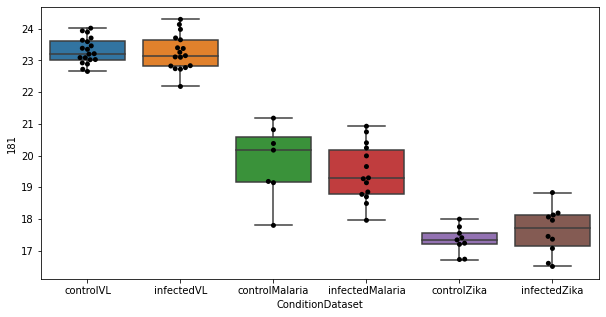

row m/z                  264.18
row retention time      3.47083
adj p-val             0.0034148
t-score                 3.43573
custom_id                  2037
compound_names              NaN
compound_id              row170
pathway                     NaN
standards_match             NaN
Name: 2037, dtype: object


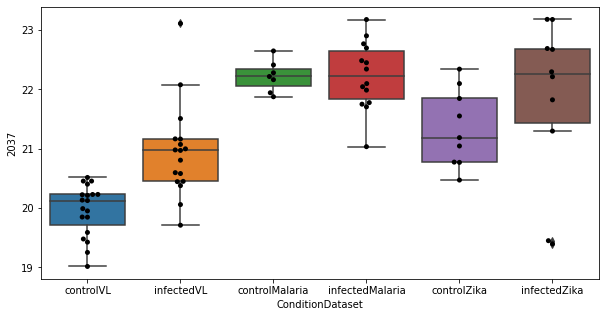

row m/z                                                       146.118
row retention time                                            4.32823
adj p-val                                                  0.00066662
t-score                                                       3.99166
custom_id                                                         608
compound_names        ['propionyl-carnitine', '3-Dehydroxycarnitine']
compound_id                                           ['E35', 'E153']
pathway                    ['Carnitine shuttle', 'Lysine metabolism']
standards_match                                                   NaN
Name: 608, dtype: object


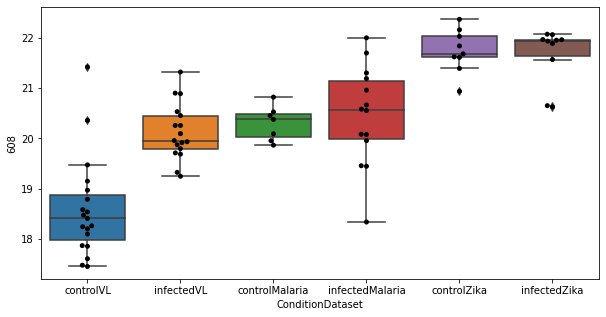

row m/z                160.116
row retention time     10.4075
adj p-val             0.664076
t-score              -0.559885
custom_id                  825
compound_names             NaN
compound_id             row524
pathway                    NaN
standards_match            NaN
Name: 825, dtype: object


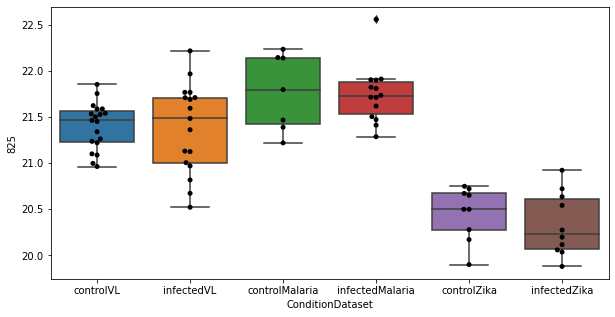

row m/z                261.121
row retention time     6.69969
adj p-val             0.796473
t-score               0.336884
custom_id                 2012
compound_names             NaN
compound_id             row559
pathway                    NaN
standards_match            NaN
Name: 2012, dtype: object


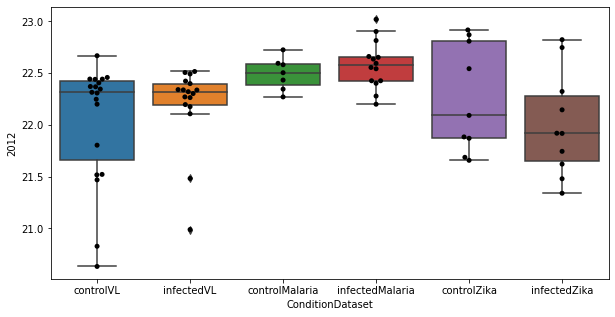

row m/z                                          76.0393
row retention time                               12.3886
adj p-val                                       0.357473
t-score                                          1.13958
custom_id                                             18
compound_names        ['Glycine; Aminoacetic acid; Gly']
compound_id                                     ['E167']
pathway                                              NaN
standards_match                                  Glycine
Name: 18, dtype: object


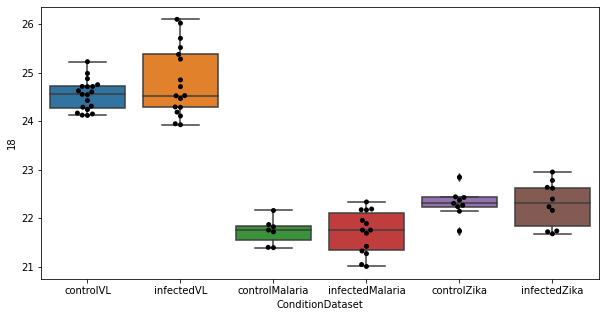

row m/z                  814.687
row retention time       3.26715
adj p-val             0.00201251
t-score                 -3.62141
custom_id                   2998
compound_names               NaN
compound_id               row158
pathway                      NaN
standards_match              NaN
Name: 2998, dtype: object


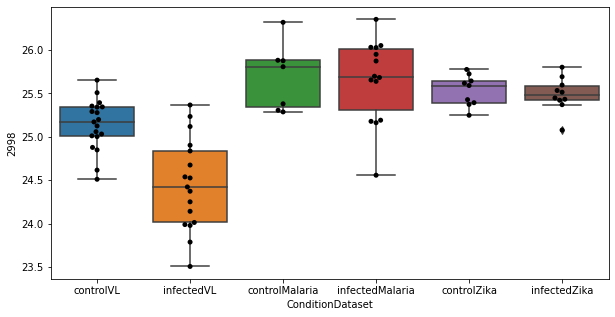

row m/z                 132.142
row retention time      9.27349
adj p-val             0.0365366
t-score                 2.47067
custom_id                   420
compound_names              NaN
compound_id              row260
pathway                     NaN
standards_match             NaN
Name: 420, dtype: object


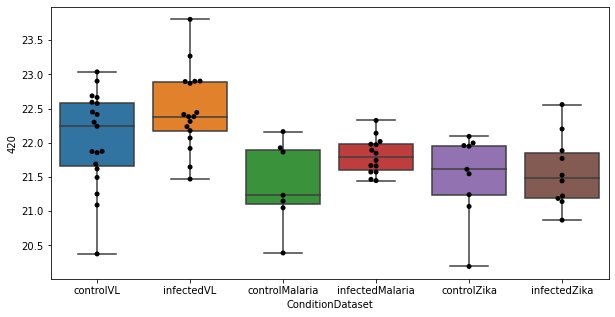

row m/z                                                          148.06
row retention time                                              11.7584
adj p-val                                                      0.215753
t-score                                                         1.52577
custom_id                                                           630
compound_names        ['5-Oxo-L-proline', 'DL-Glutamate; DL-Glutamin...
compound_id                             ['E15', 'E110', 'E207', 'E560']
pathway               ['Pyrimidine metabolism', 'Nitrogen metabolism...
standards_match                                                     NaN
Name: 630, dtype: object


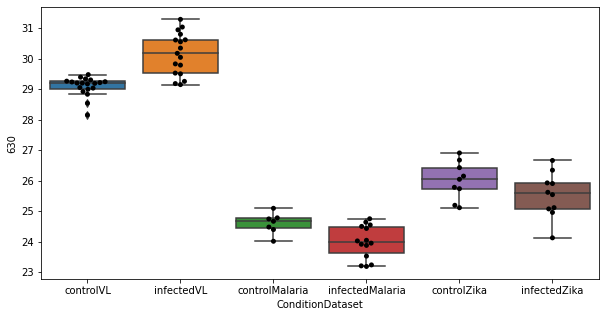

row m/z                  232.118
row retention time       4.37089
adj p-val             0.00961875
t-score                  3.02177
custom_id                   1752
compound_names               NaN
compound_id               row215
pathway                      NaN
standards_match              NaN
Name: 1752, dtype: object


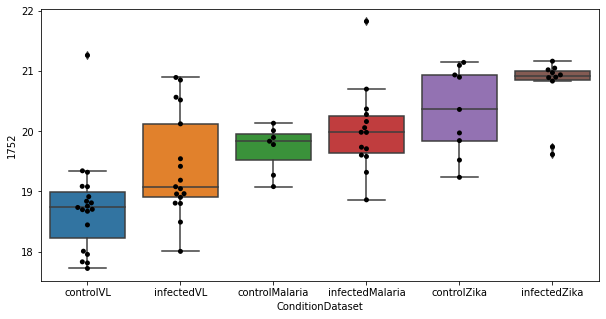

row m/z                                                         112.051
row retention time                                              9.76502
adj p-val                                                    0.00019482
t-score                                                         4.38706
custom_id                                                           168
compound_names                           ['Cytosine (in DNA)$Cytosine']
compound_id                                                    ['E626']
pathway               ['Pyrimidine metabolism', 'Methionine and cyst...
standards_match                                                cytosine
Name: 168, dtype: object


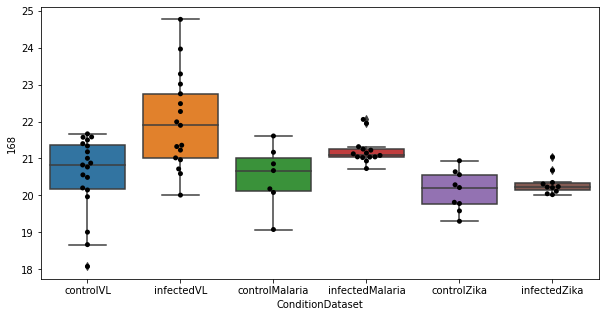

row m/z                 127.087
row retention time       6.7179
adj p-val             0.0208099
t-score                -2.72271
custom_id                   330
compound_names              NaN
compound_id              row233
pathway                     NaN
standards_match             NaN
Name: 330, dtype: object


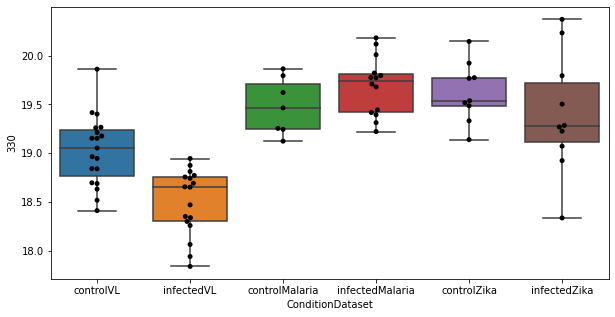

In [66]:
for i in list(importance.index)[0:first_x_values]:
    print(annotated_data.loc[int(i)])
    plot_boxplots(samples_values_filled, str(i), 'ConditionDataset', (15,30), y = False )

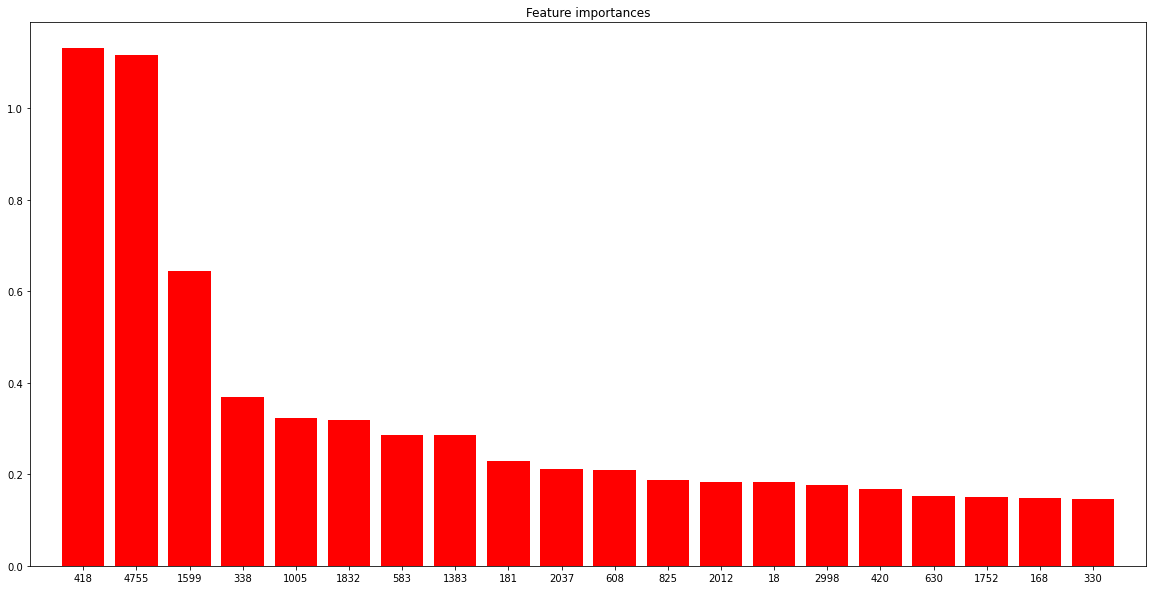

In [67]:
importance = pd.DataFrame(importance, index=training_data.columns, 
                          columns=["Importance"])

importance = importance.sort_values(by='Importance',ascending = False)

# Plot the feature importances of the forest
first_x_values = 20

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(first_x_values), importance['Importance'][0:first_x_values], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(first_x_values), importance.index[0:first_x_values])
plt.xlim([-1, first_x_values])
plt.show()

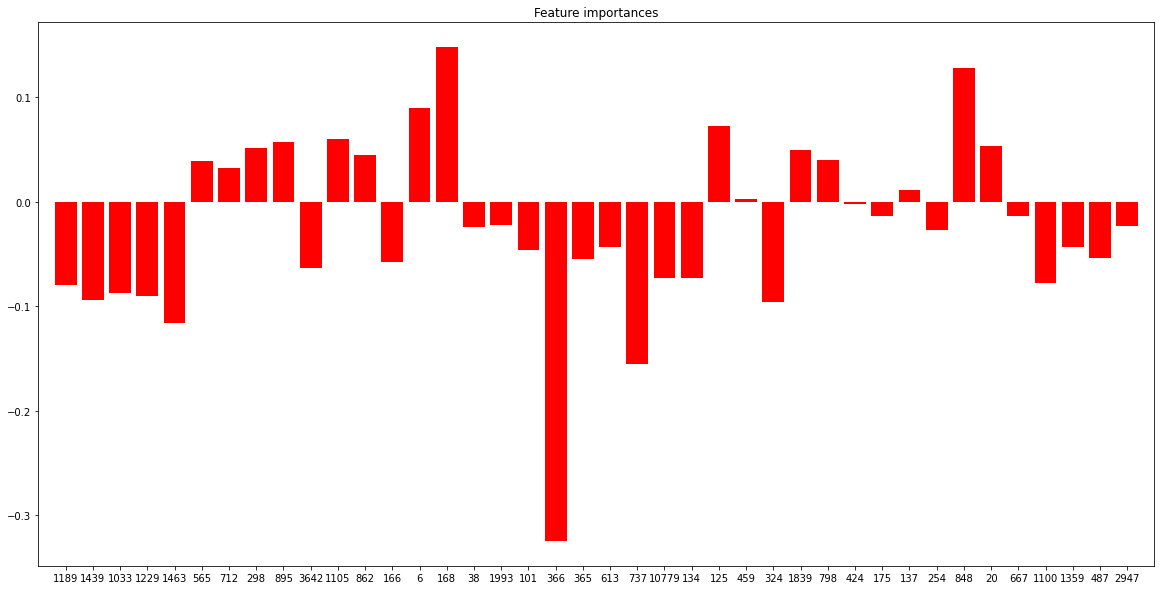

In [63]:
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(id_list)), importance.loc[id_list]['Importance'], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(len(id_list)), id_list)
plt.xlim([-1, len(id_list)])
plt.show()

### Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()
# fit the model
model.fit(predictor, np.array(target.transpose())[0])
# get importance
importance = model.feature_importances_

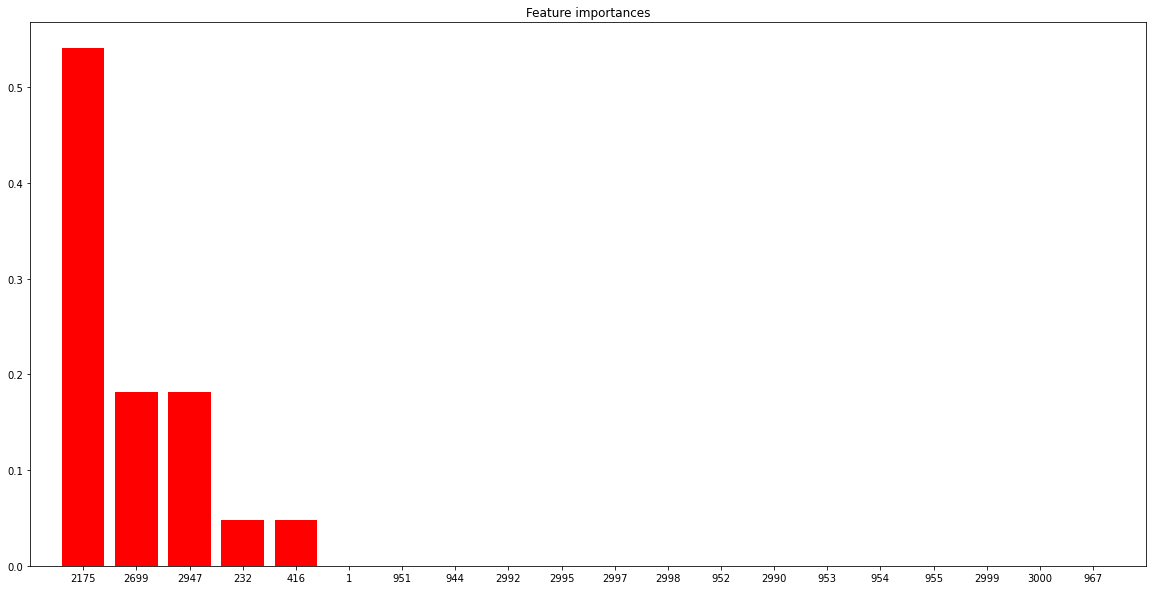

In [69]:
importance = pd.DataFrame(importance, index=training_data.columns, 
                          columns=["Importance"])

importance = importance.sort_values(by='Importance',ascending = False)

# Plot the feature importances of the forest
first_x_values = 20

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(first_x_values), importance['Importance'][0:first_x_values], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(first_x_values), importance.index[0:first_x_values])
plt.xlim([-1, first_x_values])
plt.show()

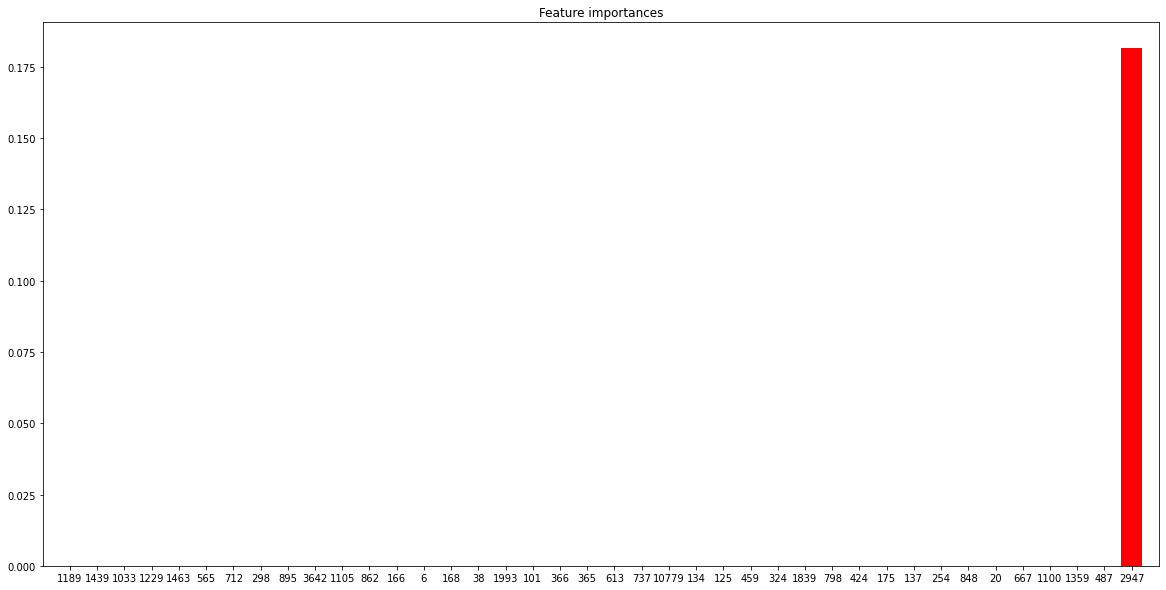

In [70]:
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(id_list)), importance.loc[id_list]['Importance'], color="r", 
        align="center")
#yerr=importance['Std'][0:first_x_values]
plt.xticks(range(len(id_list)), id_list)
plt.xlim([-1, len(id_list)])
plt.show()

In [72]:
def get_validation_results(cldf_predict_data, cldf_test_target, discrete):
    from sklearn.metrics import roc_curve, auc
    tp = 0
    tn = 0
    fn = 0
    fp = 0
    
    if discrete == True:
        for predict, observed in zip(cldf_predict_data, cldf_test_target):
            
            if predict == observed and predict == 1:
                tp += 1
            elif predict == observed and predict == 0 :
                tn += 1
            elif predict == 0 and observed == 1:
                fn += 1
            elif predict == 1 and observed == 0:
                fp += 1
    else:
        for predict, observed in zip(cldf_predict_data, cldf_test_target):
            if predict >= 0.5 and observed == 1:
                validation_result.append("TP")
            elif predict < 0.5 and observed == 0 :
                validation_result.append("TN")
            elif predict < 0.5  and observed == 1:
                validation_result.append("FN")
            elif predict >= 0.5 and observed == 0:
                validation_result.append("FP")
    

    accuracy = round((tp+tn)/(tp+fp+tn+fn), 4)
    precision = round(tp/(tp+fp), 4)
    true_positive_rate = round(tp/(tp+fn), 4)
    false_positive_rate = round(fp/(fp+tn),4)
    
    fpr, tpr, thresholds = roc_curve(cldf_test_target, cldf_predict_data)
    roc_auc = auc(fpr, tpr)
    

    return ((accuracy, precision, true_positive_rate, false_positive_rate, roc_auc))

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#instantiate the model (using the default parameters)
knn = KNeighborsClassifier(n_neighbors=1)
logreg = LogisticRegression()
ldaclf = LinearDiscriminantAnalysis()
qdaclf = QuadraticDiscriminantAnalysis()
byr = BayesianRidge(compute_score=True)
gnb = MultinomialNB()
svmclf = svm.SVC()
rfclf = RandomForestClassifier(n_estimators=100)

#fit the model with data
knn.fit(training_data, training_data_target)
logreg.fit(training_data, training_data_target)
ldaclf.fit(training_data, training_data_target)
qdaclf.fit(training_data, training_data_target)
byr.fit(training_data, training_data_target)
svmclf.fit(training_data, training_data_target)
rfclf.fit(training_data, training_data_target)

#predict the response for new observation
knn_predict_data = knn.predict(test_data)
#logreg_predict_data = logreg.predict(test_data)
ldaclf_predict_data = ldaclf.predict(test_data)
qdaclf_predict_data = ldaclf.predict(test_data)
#byr_predict_data = byr.predict(test_data)
gnb_predict_data = gnb.fit(training_data, training_data_target).predict(test_data)
svm_predict_data = svmclf.predict(test_data)
rf_predict_data = rfclf.predict(test_data)


results = []
results.append(("RF", get_validation_results(rf_predict_data, np.array(test_data_target.transpose())[0], discrete= True)))
results.append(("SVC", get_validation_results(svm_predict_data, np.array(test_data_target.transpose())[0], discrete= True)))
results.append(("QDA", get_validation_results(qdaclf_predict_data, np.array(test_data_target.transpose())[0], discrete = True)))
#results.append(("Bayesian Ridge", get_validation_results(byr_predict_data, np.array(test_data_target.transpose())[0], discrete=False)))
results.append(("KNeighbours",get_validation_results(knn_predict_data, np.array(test_data_target.transpose())[0], discrete = True)))
#results.append(("Logistic regression", get_validation_results(logreg_predict_data, test_data_target, discrete=True)))
results.append(("LDA", get_validation_results(ldaclf_predict_data, np.array(test_data_target.transpose())[0], discrete= True)))
results.append(("Multinomial Naive Bayesian",get_validation_results(gnb_predict_data, np.array(test_data_target.transpose())[0], discrete = True)))
df = pd.DataFrame(results, columns=["ModelName","Accuracy,  Precision,  True_positive_rate,  False_positive_rate, AUC" ])

In [76]:
df

,ModelName,"Accuracy, Precision, True_positive_rate, False_positive_rate, AUC"
0,RF,"(0.9565, 0.9231, 1.0, 0.0909, 0.9545454545454545)"
1,SVC,"(0.8696, 0.8, 1.0, 0.2727, 0.8636363636363636)"
2,QDA,"(0.7826, 0.8889, 0.6667, 0.0909, 0.78787878787..."
3,KNeighbours,"(1.0, 1.0, 1.0, 0.0, 1.0)"
4,LDA,"(0.7826, 0.8889, 0.6667, 0.0909, 0.78787878787..."
5,Multinomial Naive Bayesian,"(0.913, 0.8571, 1.0, 0.1818, 0.9090909090909091)"


In [78]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_data, test_data_target)
roc_auc = auc(false_positive_rate, true_positive_rate)

ValueError: continuous-multioutput format is not supported

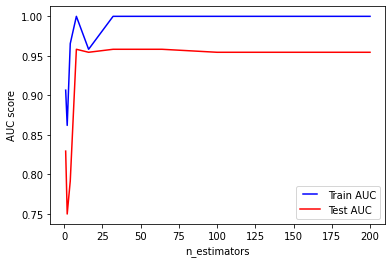

In [79]:
from sklearn.metrics import roc_curve, auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(training_data, training_data_target)
    train_pred = rf.predict(training_data)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(training_data_target, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(test_data)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_data_target, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()